In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/AI-Lab/IMDB_Dataset.csv')

In [ ]:
news_data = data.iloc[:10000,:]

In [ ]:
news_data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9995,"Fun, entertaining movie about WWII German spy ...",positive
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative


In [ ]:
y = news_data['sentiment']

In [ ]:
y.value_counts()

positive    5028
negative    4972
Name: sentiment, dtype: int64

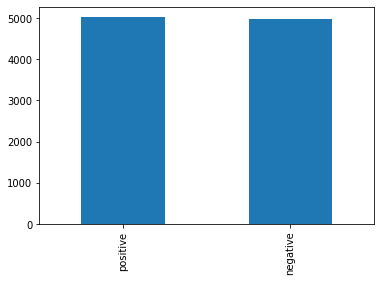

In [ ]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar')
plt.show()

In [ ]:
y

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 10000, dtype: object

In [ ]:
news_data.sentiment.unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
y = y.to_numpy().astype('str')

In [ ]:
y

array(['positive', 'positive', 'positive', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

In [ ]:
news_body = news_data.iloc[:,1]

In [ ]:
news_body

0       positive
1       positive
2       positive
3       negative
4       positive
          ...   
9995    positive
9996    negative
9997    negative
9998    negative
9999    positive
Name: sentiment, Length: 10000, dtype: object

In [ ]:
news_body = news_data['review']

In [ ]:
t=news_body.to_numpy()

In [ ]:
t

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
import re
documents = []
stemmer = WordNetLemmatizer()
for sen in range(0, len(t)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(t[sen]))
    # remove all single characters from middle
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)    
    # Converting to Lowercase
    document = document.lower()
    document = re.sub("^\d+\s|\s\d+\s|\s\d+$", ' ', document)
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)

In [ ]:
documents

['one of the other reviewer ha mentioned that after watching just oz episode you ll be hooked they are right a this is exactly what happened with me br br the first thing that struck me about oz wa it brutality and unflinching scene of violence which set in right from the word go trust me this is not show for the faint hearted or timid this show pull no punch with regard to drug sex or violence it is hardcore in the classic use of the word br br it is called oz a that is the nickname given to the oswald maximum security state penitentary it focus mainly on emerald city an experimental section of the prison where all the cell have glass front and face inwards so privacy is not high on the agenda em city is home to many aryan muslim gangsta latino christian italian irish and more so scuffle death stare dodgy dealing and shady agreement are never far away br br would say the main appeal of the show is due to the fact that it go where other show wouldn dare forget pretty picture painted fo

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer( encoding='utf-8',stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
terms = vectorizer.get_feature_names()
print(len(terms))

46647


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X.shape #shows total no of data and keywords

(10000, 46647)

In [ ]:
terms

['00',
 '000',
 '00001',
 '00am',
 '00s',
 '01',
 '01pm',
 '06th',
 '07',
 '08th',
 '10',
 '100',
 '100b',
 '100bt',
 '100miles',
 '100th',
 '100times',
 '101st',
 '1040s',
 '10ft',
 '10th',
 '10x',
 '11',
 '1100ad',
 '110mph',
 '11f',
 '11m',
 '11th',
 '12',
 '12a',
 '12m',
 '12th',
 '13',
 '1300s',
 '135m',
 '13th',
 '14',
 '1416',
 '14a',
 '14th',
 '14yr',
 '14ème',
 '15',
 '1500s',
 '15ft',
 '15k',
 '15pm',
 '15th',
 '16',
 '1679',
 '16mm',
 '16th',
 '16ème',
 '16éme',
 '17',
 '1794',
 '17million',
 '17th',
 '18',
 '1800s',
 '180d',
 '180s',
 '1840s',
 '1850ies',
 '1860s',
 '1861',
 '1865',
 '187',
 '1870s',
 '1890s',
 '1899',
 '18a',
 '18th',
 '19',
 '1900s',
 '1904',
 '1905',
 '1909',
 '1910s',
 '1915',
 '1918',
 '1920s',
 '1930s',
 '1932',
 '1933',
 '1939',
 '1940',
 '1940s',
 '1944',
 '1945',
 '1950',
 '1950s',
 '1951',
 '1957',
 '1959',
 '1960s',
 '1965',
 '1966',
 '1969',
 '1970',
 '1970s',
 '1972',
 '1973',
 '1974',
 '1975',
 '1979',
 '1980',
 '1980s',
 '1982',
 '1983',
 '19

In [ ]:
print(terms[10344])

decider


In [ ]:
Y=[] #level for positive 1 and for negative 0
for i in range(len(y)):
    if y[i] =='positive':
      Y.append(1)
    elif y[i] == 'negative':
      Y.append(0)
    else: 
      Y.append(2)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #80% training data 20% test data 

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(X_train, y_train)

GaussianNB()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


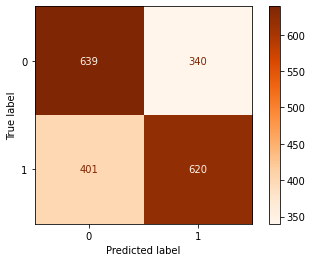

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test,cmap="Oranges") 
plt.show()

In [ ]:
#Predict Output
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 639 is true negative, 340 false negative, 401 false positive, 620 true positive
print(confusion_matrix(y_test,y_pred)) #first part are the negative and second are the positives
print(classification_report(y_test,y_pred)) #support is the amount of data tested for neg 979 for pos 1021
print(accuracy_score(y_test, y_pred))

[[639 340]
 [401 620]]
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       979
           1       0.65      0.61      0.63      1021

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000

0.6295


In [ ]:
#KNN classification
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier()

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


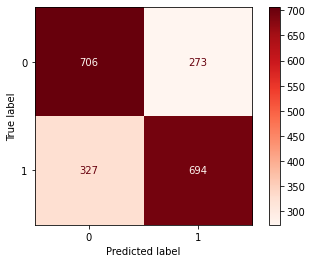

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, y_test,cmap="Reds") 
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[706 273]
 [327 694]]
              precision    recall  f1-score   support

           0       0.68      0.72      0.70       979
           1       0.72      0.68      0.70      1021

    accuracy                           0.70      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.70      0.70      0.70      2000

0.7


In [ ]:
# Load libraries for decision tree
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


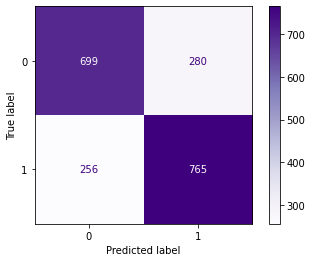

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test,cmap="Purples") 
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[699 280]
 [256 765]]
              precision    recall  f1-score   support

           0       0.73      0.71      0.72       979
           1       0.73      0.75      0.74      1021

    accuracy                           0.73      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.73      0.73      0.73      2000

0.732


In [ ]:
 #logistic regression
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)
# model.fit(X_test,y_test)


LogisticRegression(C=10.0, random_state=0, solver='liblinear')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


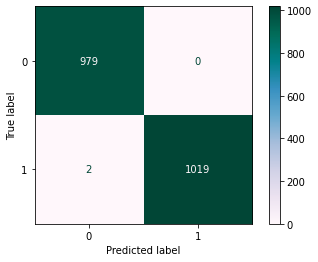

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap="PuBuGn") 
plt.show()

In [ ]:
p_pred = model.predict_proba(x)
y_pred = model.predict(x)
score_ = model.score(x, y)
conf_m = confusion_matrix(y, y_pred)
report = classification_report(y, y_pred)

In [ ]:
print('conf_m:', conf_m, sep='\n', end='\n\n')
print('report:', report, sep='\n')
print('score_:', score_, end='\n\n')

conf_m:
[[2 1]
 [1 6]]

report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.86      0.86      0.86         7

    accuracy                           0.80        10
   macro avg       0.76      0.76      0.76        10
weighted avg       0.80      0.80      0.80        10

score_: 0.8

